In [272]:
! pip install xlrd

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cv_test = pd.read_csv("C:/Users/BIT/Downloads/project_1.csv", encoding='utf-8')
cv_test


,분실물SEQ,분실물상태,등록일자,수령일자,유실물상세내용,분실장소,분실물등록자ID,분실물명,분실물종류,수령자치구,수령위치(회사),수령물건,조회수,추출일자
0,61733474,수령,2022-01-06,2022-01-06 00:00:00.0,저희 원버스에서는 2022년 01월 06일 핸드폰을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,원버스,여자핸드백,핸드폰,eunpyong,원버스,파크빌아파트-은평공영차고지,20.0,2022-01-06 00:00:00.0
1,61733473,수령,2022-01-06,2022-01-05 00:00:00.0,저희 원버스에서는 2022년 01월 05일 기타을(를) 습득/보관 하(였습니다.)고...,회사내 분실센터,원버스,빨간벙어리장갑,기타,eunpyong,원버스,홍대입구-은평공영차고지,2.0,2022-01-05 00:00:00.0
2,61733401,수령,2022-01-04,2022-01-04 00:00:00.0,저희 삼이택시에서는 2022년 01월 04일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,samitaxi,아이폰(고객님과 연락됨),핸드폰,kwanak,삼이택시,차량내-,45.0,2022-01-04 00:00:00.0
3,61733402,보관,2022-01-04,2022-01-04 00:00:00.0,저희 삼이택시에서는 2022년 01월 04일 서류봉투을(를) 습득/보관 하(였습니다...,회사내 분실센터,samitaxi,서류및 장갑(고객님과 연락됨),서류봉투,kwanak,삼이택시,차량내-,4.0,2022-01-04 00:00:00.0
4,61733472,수령,2022-01-06,2022-01-04 00:00:00.0,저희 원버스에서는 2022년 01월 04일 기타을(를) 습득/보관 하(였습니다.)고...,회사내 분실센터,원버스,안경집에든안경,기타,eunpyong,원버스,홍대입구-은평공영차고지,2.0,2022-01-04 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275516,61685194,수령,2016-09-21,2007-09-15 00:00:00.0,저희 중부운수에서는 2007년 09월 15일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,중부운수,선물세트,기타,강서구,중부운수,신월차고지-신월차고지,2.0,2007-09-15 00:00:00.0
275517,7352639,수령,2009-04-22,2007-03-27 00:00:00.0,저희 경일운수에서는 2007년 03월 27일 핸드폰을(를) 습득/보관 하(였습니다....,회사내 분실센터,kyoungil10,검정색삼성,핸드폰,도봉구,경일운수,차내-,8.0,2007-03-27 00:00:00.0
275518,2992507,수령,2009-02-07,2007-02-06 00:00:00.0,저희 홍성운수에서는 2007년 02월 06일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,hongsung,노트북,핸드폰,마포구,홍성운수,수지(만현마을)-,12.0,2007-02-06 00:00:00.0
275519,2923641,수령,2009-02-05,2007-01-30 00:00:00.0,저희 대원여객에서는 2007년 01월 30일 기타을(를) 습득/보관 하(였습니다.)...,회사내 분실센터,대원여객,CT사진,기타,도봉구,대원여객,차량내-,9.0,2007-01-30 00:00:00.0


In [274]:
a = cv_test.sort_values(by = '등록일자', ascending = False)

In [275]:
b = pd.DataFrame(a, columns = ['등록일자', '분실물장소', '분실물종류'])
b = b.reset_index()
b

,index,등록일자,분실물장소,분실물종류
0,0,2022-01-06,NaN,핸드폰
1,1,2022-01-06,NaN,기타
2,4,2022-01-06,NaN,기타
3,6,2022-01-06,NaN,핸드폰
4,7,2022-01-06,NaN,지갑
...,...,...,...,...
275516,13530,NaN,NaN,기타
275517,26682,NaN,NaN,기타
275518,30188,NaN,NaN,기타
275519,158790,NaN,NaN,기타


In [276]:
b['분실물종류'].value_counts()

기타      83256
핸드폰     82416
지갑      40992
가방      30198
쇼핑백     22898
옷        6646
책        4146
서류봉투     2002
베낭       1776
파일       1187
장난감         4
Name: 분실물종류, dtype: int64

In [277]:
b['등록일자'].value_counts()

2017/04/05    4366
2016/12/31    1655
2016/12/30    1650
2016/09/24    1641
2017/01/01    1633
              ... 
2020-10-31       1
2020-10-30       1
2020-10-29       1
2013-01-12       1
2006-12-04       1
Name: 등록일자, Length: 4659, dtype: int64

In [287]:
c = b.drop(columns=['index'])
years = c.loc[0:1520]
December= c.loc[0:161]
November=  c.loc[162:302]
October=c.loc[303:413]
September=c.loc[414:538]
August=c.loc[539:642]
July=c.loc[643:729]
June =c.loc[730:921]
May=c.loc[922:1071]
April =c.loc[1072:1201]
March =c.loc[1202:1341]
February =c.loc[1342:1434]
January =c.loc[1435:1538]
January['분실물종류'].value_counts()

기타     33
핸드폰    27
가방     15
지갑     13
쇼핑백     7
베낭      5
옷       4
Name: 분실물종류, dtype: int64

<AxesSubplot:>

C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48516 missing from current font.

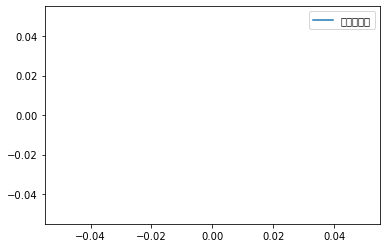

In [302]:
# January.plot(y=['등록일자'], logy=True, ylim=(20, 0), figsize=(10, 6), grid=True, xlabel="일수", ylabel="분실개수", marker='o', ms=3)
January.plot()